# Plot raw and preprocessed gaze data for each session

In [1]:
%matplotlib inline

import os
import glob

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] =(12,9)

#### Plot Functions Helper

In [2]:
# Plot coordinates
def plot_series(t,X, d=.1):
    # dots per inch
    dpi = 100.0

    # create a figure
    figure = plt.figure(dpi=dpi)

    fig, ax = plt.subplots()
    ax.plot(t, X, 'o-', linewidth=.4, markersize=.4)
    ax.set_aspect("auto")
    
    plt.show()

def plot_all_session(X,Y, d=.1):
    # dots per inch
    dpi = 100.0
    display_size = (1280, 800)

    # determine the figure size in inches
    figsize = (display_size[0]/dpi, display_size[1]/dpi)

    # create a figure
    figure = plt.figure(figsize=figsize, dpi=dpi)

    m = 6
    n, _ = X.shape
    
    n = (n/m) + 1
    
    for i, sid in enumerate(session_id):

        ax = plt.subplot(n,m,i+1, title=str(sid), adjustable='box')
        ax.axis([0, display_size[0], 0, display_size[1]])
        
        ax.plot(X[i,:], Y[i,:], 'o-', linewidth=.04, markersize=d)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
            
        ax.set_aspect("equal")
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()
    
def plot_data_per_session(X, Y, sid=None):
    
    i = 0 if sid is None else session_id.index(sid)
    
    t = np.linspace(0, X[i,:].size, X[i,:].size)
    
    # dots per inch
    dpi = 100.0
    display_size = (1280, 800)

    # determine the figure size in inches
    figsize = (display_size[0]/dpi, display_size[1]/dpi)

    # create a figure
    figure = plt.figure(figsize=figsize, dpi=dpi)

    grid = plt.GridSpec(4, 2, hspace=0.2, wspace=0.2)
    
    # plot Gaze
    ax = plt.subplot(grid[0:2,0:2], title="gaze", adjustable='box')
    ax.axis([0, display_size[0], 0, display_size[1]])    
    ax.plot(X[i,:], Y[i,:], 'o-', linewidth=.04, markersize=.4)
    ax.set_aspect(8/5)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.invert_yaxis()
    
    # Plot X
    ax = plt.subplot(grid[2,0:2], title="X", adjustable='box')
    ax.plot(X[i,:], 'o-', linewidth=.4, markersize=.4)
    ax.set_aspect("auto")
    
    # Plot Y
    ax = plt.subplot(grid[-1,0:2], title="Y", adjustable='box')   
    ax.plot(Y[i,:], 'o-', linewidth=.4, markersize=.4)
    ax.set_aspect("auto")
    
    plt.show()

#### Load data

In [3]:
files = map(np.load, glob.glob("export/data/gaze*.npz"))

# load session info
session_info = [ f["session_info"].tolist() for f in files ]
session_id = [ int(s["sessionId"]) for s in session_info ]

def get_data(key):
    
    # Load X data
    x = [ f[key][:,0].T for f in files ]
    x_lmax = min(map(len, x))
    x = np.vstack(( c[:x_lmax] for c in x ))

    # Load Y data
    y = [ f[key][:,1].T for f in files ]
    y_lmax = min(map(len, y))
    y = np.vstack(( c[:y_lmax] for c in y ))
    
    if key in ("fixations_raw", "fixations"):
    
        # Load D data
        d = [ f[key][:,2].T for f in files ]
        d_lmax = min(map(len, d))
        d = np.vstack(( c[:d_lmax] for c in d ))
    
        return x, y, d
    
    return x, y

In [4]:
print session_id

[2894, 3790, 3538, 814, 1956, 10, 2492, 1206, 3028, 948, 160, 3664, 426, 2090, 546, 2358, 2760, 2224, 1588, 2626, 3412, 1698]


#### Coordinates

In [5]:
# load raw coordinate
coordinates_raw_x, coordinates_raw_y = get_data("coordinates_raw")

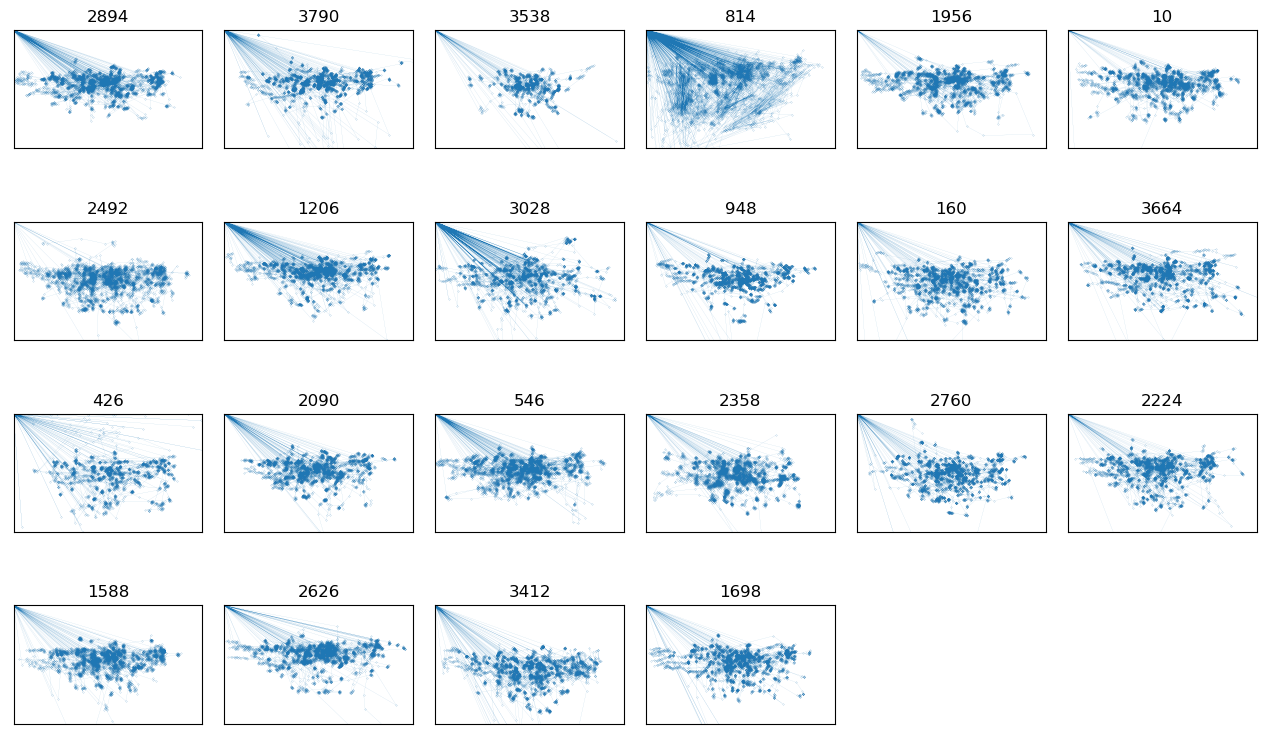

In [6]:
# Plot raw coordinates
plot_all_session(coordinates_raw_x, coordinates_raw_y)

In [7]:
# load coordinate
coordinates_x, coordinates_y = get_data("coordinates")

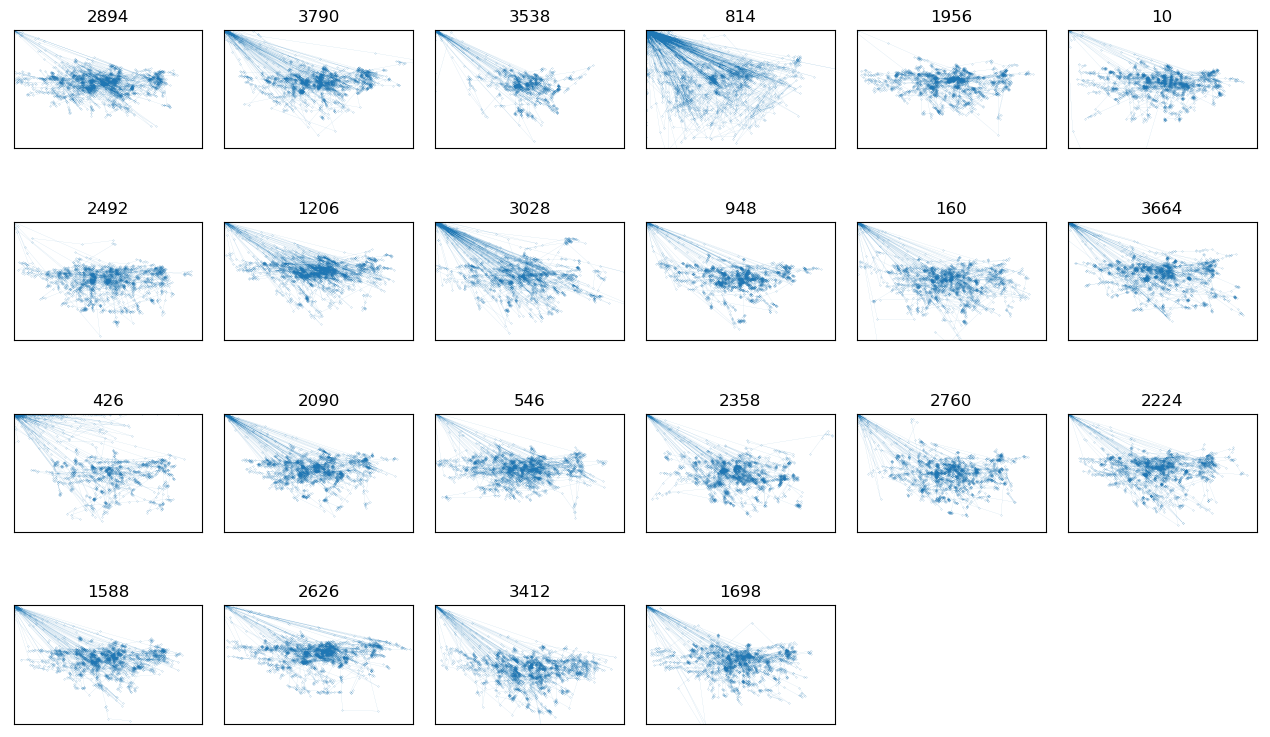

In [8]:
# Plot coordinates
plot_all_session(coordinates_x, coordinates_y)

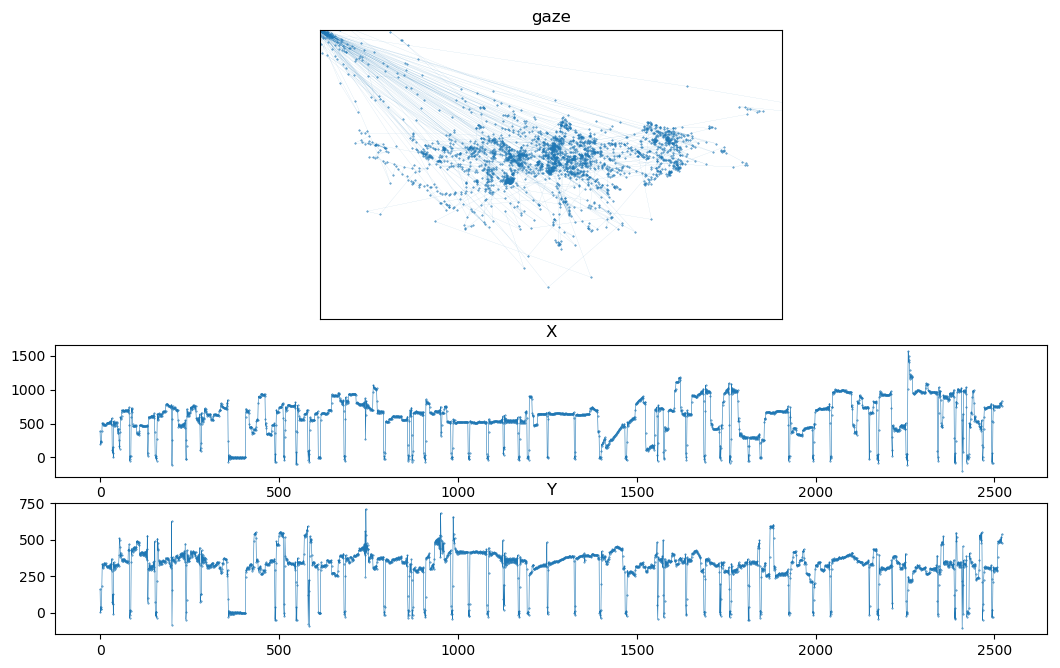

In [9]:
plot_data_per_session(coordinates_x, coordinates_y, 3790)

#### Fixations

In [10]:
# load raw fixations
fixations_raw_x, fixations_raw_y, fixations_raw_d = get_data("fixations_raw")

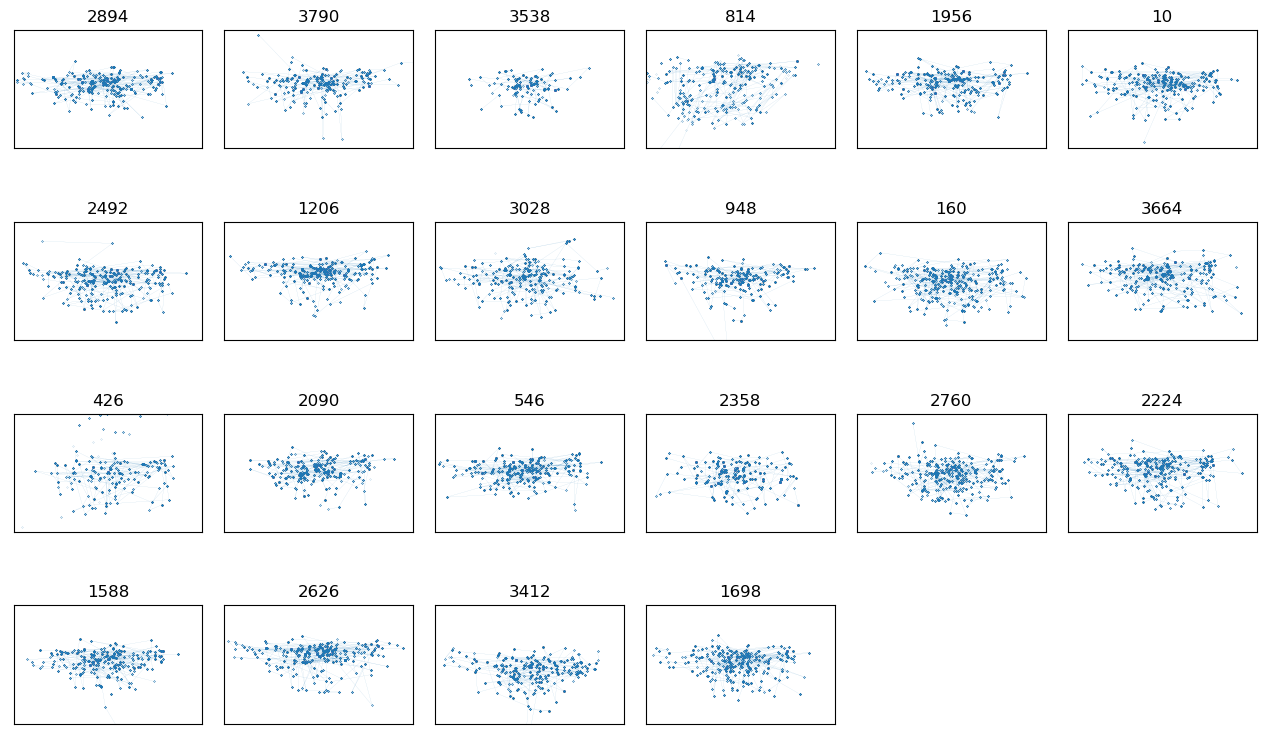

In [11]:
# Plot raw fixations
plot_all_session(fixations_raw_x, fixations_raw_y)

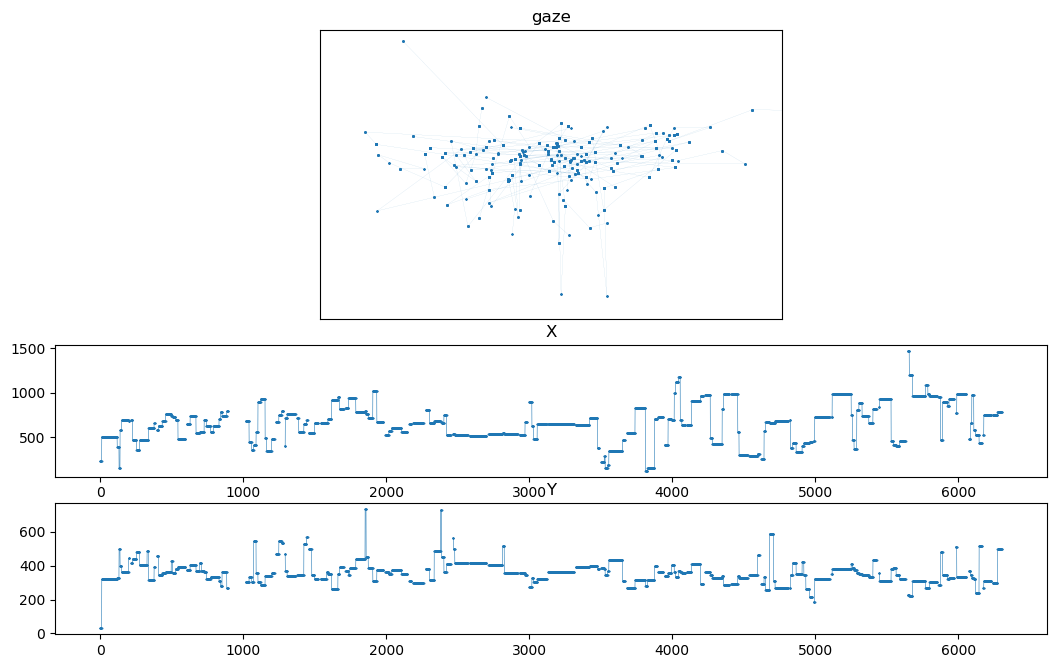

In [12]:
plot_data_per_session(fixations_raw_x, fixations_raw_y, 3790)

In [ ]:
import Tesi

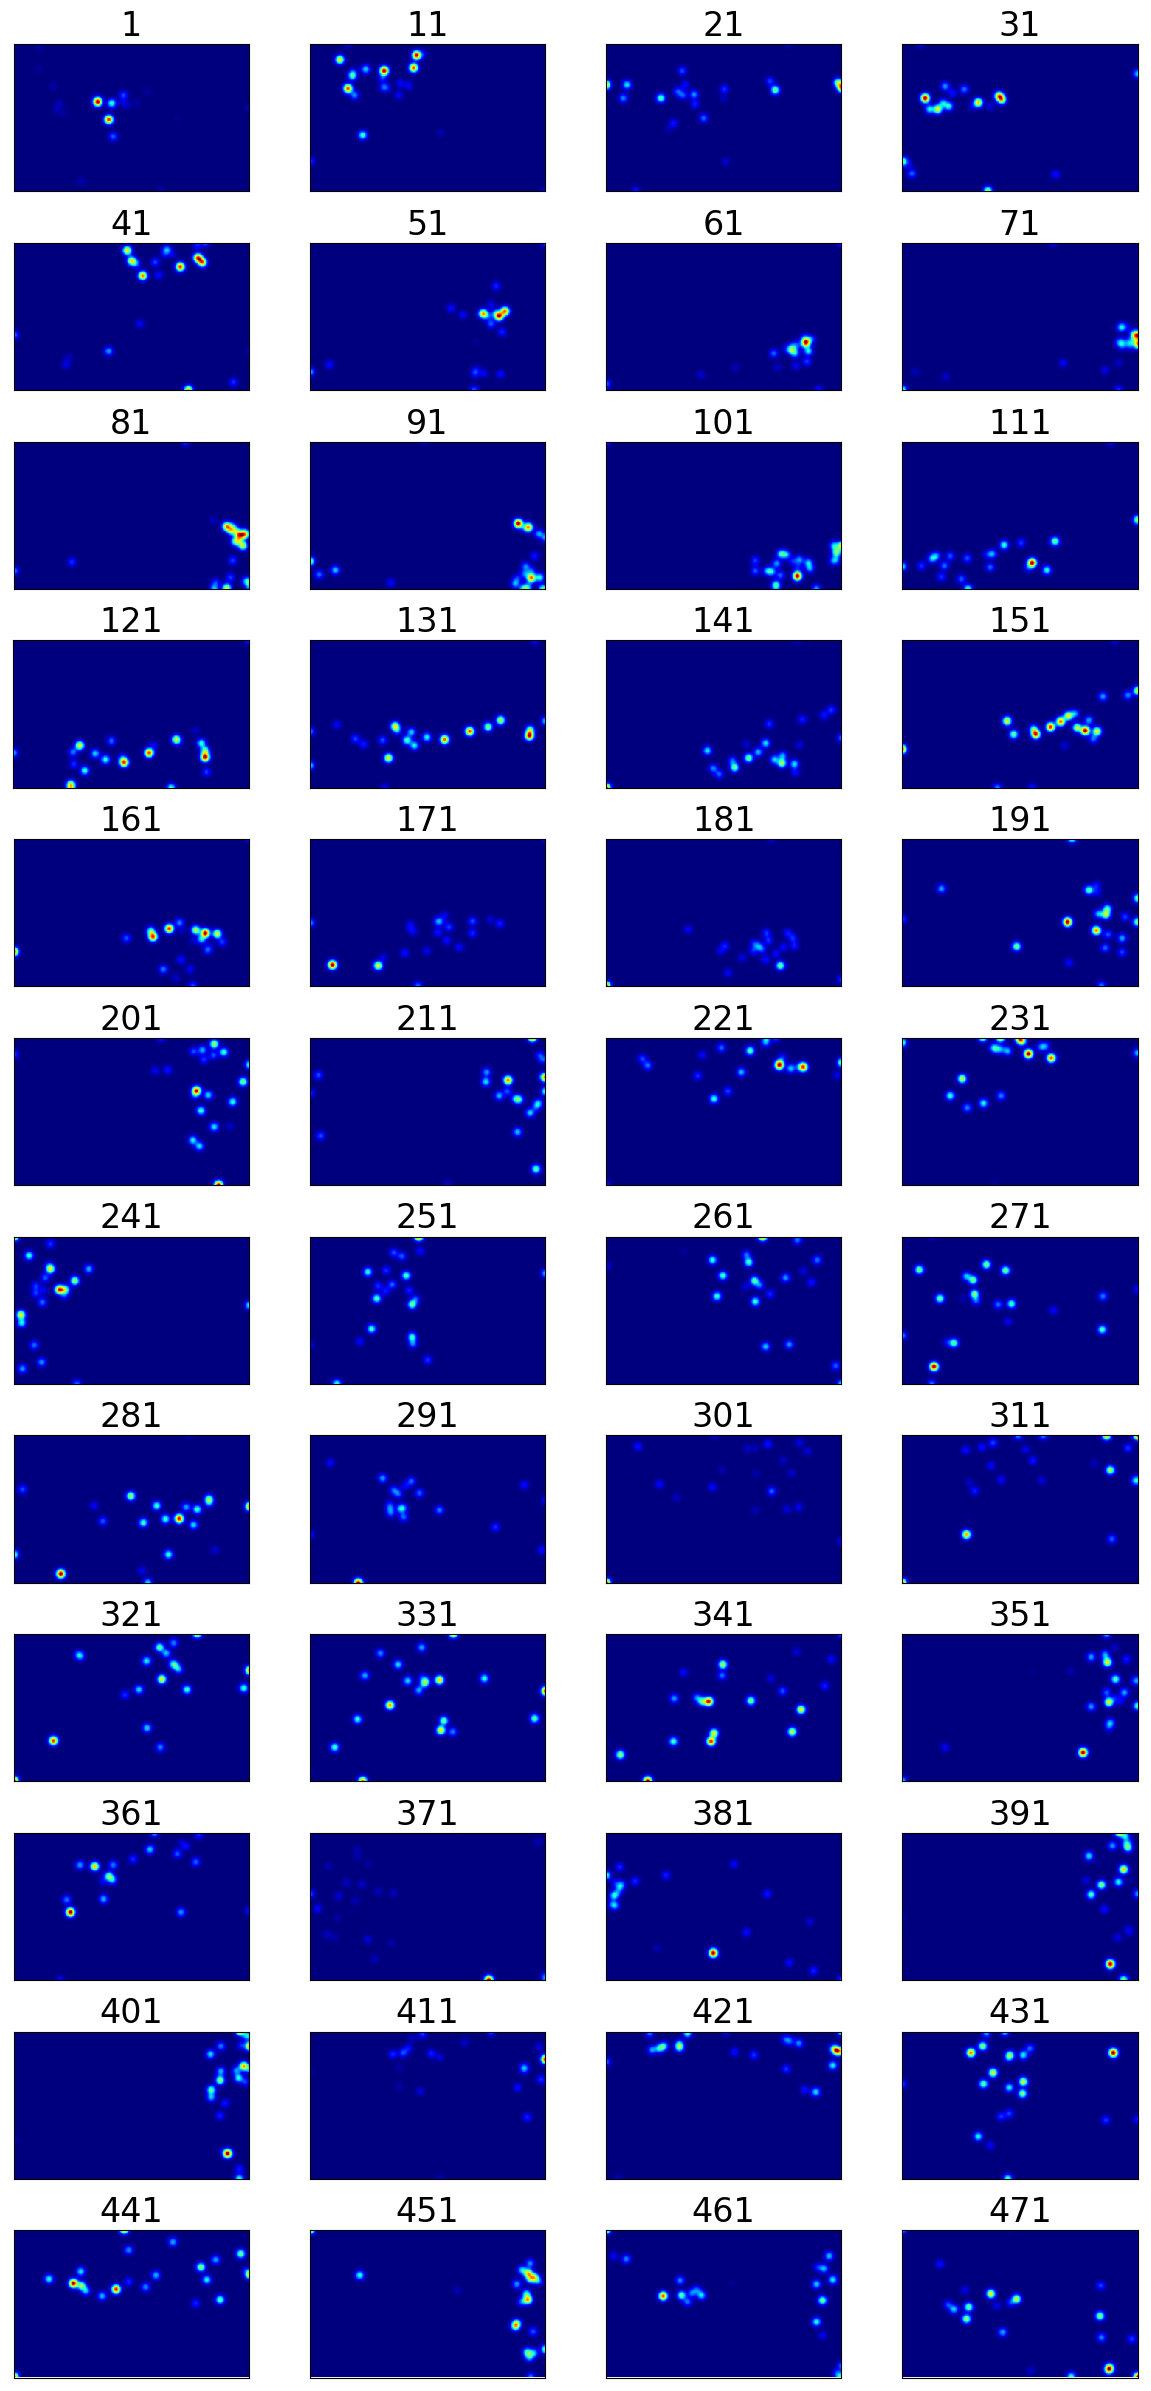

In [143]:
import scipy.ndimage as ndi

fx = fixations_x.copy()
xkeep = ~np.isnan(fx)

fy = fixations_y.copy()
ykeep = ~np.isnan(fy)

fd = fixations_d.copy()
dkeep = ~np.isnan(fd)

fx[np.isnan(fx)] = -1
fy[np.isnan(fy)] = -1
fd[np.isnan(fd)] = -1

frame_scale_factor=4

dpi = 100
bins = np.array([1280, 800])/frame_scale_factor


ncols=4
nrows=12
frame_step=10
max_frame=ncols*nrows*frame_step

# determine the figure size in inches
figsize = (bins[0]*ncols/dpi, bins[1]*nrows/dpi)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, subplot_kw=dict(xlim=[0,bins[0]], ylim=[0,bins[1]]), figsize=figsize, dpi=dpi)

for ax, frame in zip(axes.flat[0:], xrange(0, max_frame, frame_step)):

    x = fx[:,frame].flatten()
    y = fy[:,frame].flatten()
    w = fd[:,frame].flatten()

    H, xedges, yedges = np.histogram2d(x, y, weights=w, bins=bins, normed=True)

    extent = [0, bins[0], 0, bins[1]]

    im=ndi.gaussian_filter(H, sigma=4)

    ax.imshow(im.T, cmap='jet', origin='upper', extent=extent, shape=bins)

    ax.set_title(label=str(frame+1), fontdict={"fontsize" : 24})
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
        
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

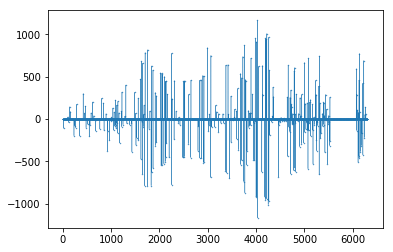

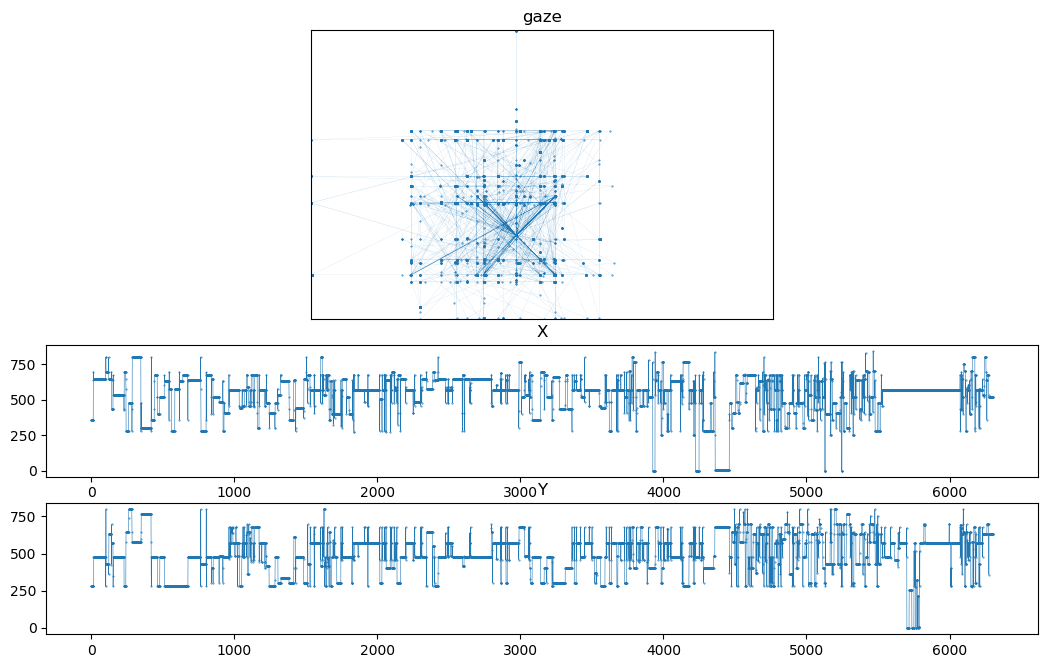

In [14]:
from scipy.interpolate import CubicSpline

def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

fx = fixations_raw_x[session_id.index(814),:].copy()
idx = np.isnan(fixations_raw_x[session_id.index(814),:])
fx[idx] = 0

fy = fixations_raw_y[session_id.index(814),:].copy()
idy = np.isnan(fixations_raw_y[session_id.index(814),:])
fy[idy] = 0

t = np.linspace(0, fx.size, fx.size)
dfx, dfy = np.diff(fx), np.diff(fy)

plot_series(t[:-1], dfx)

fx, fy = smooth(fx, 3), smooth(fy, 3)

fxcs = CubicSpline(t, fx)
fycs = CubicSpline(t, fy)

fxs = fxcs(fx)
fys = fxcs(fy)


plot_data_per_session(np.array((fxs,)), np.array((fys,)))

In [15]:
# load fixations
fixations_x, fixations_y, fixations_d = get_data("fixations")

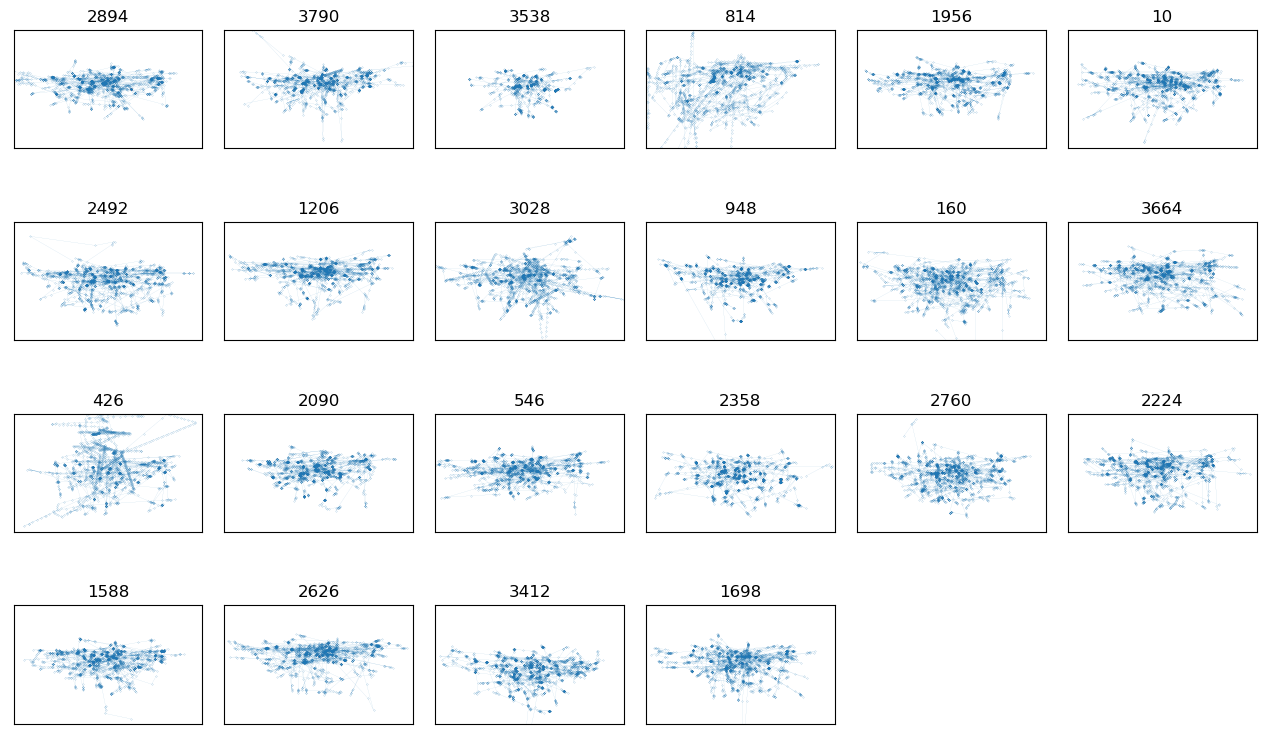

In [16]:
# Plot fixations
plot_all_session(fixations_x, fixations_y)

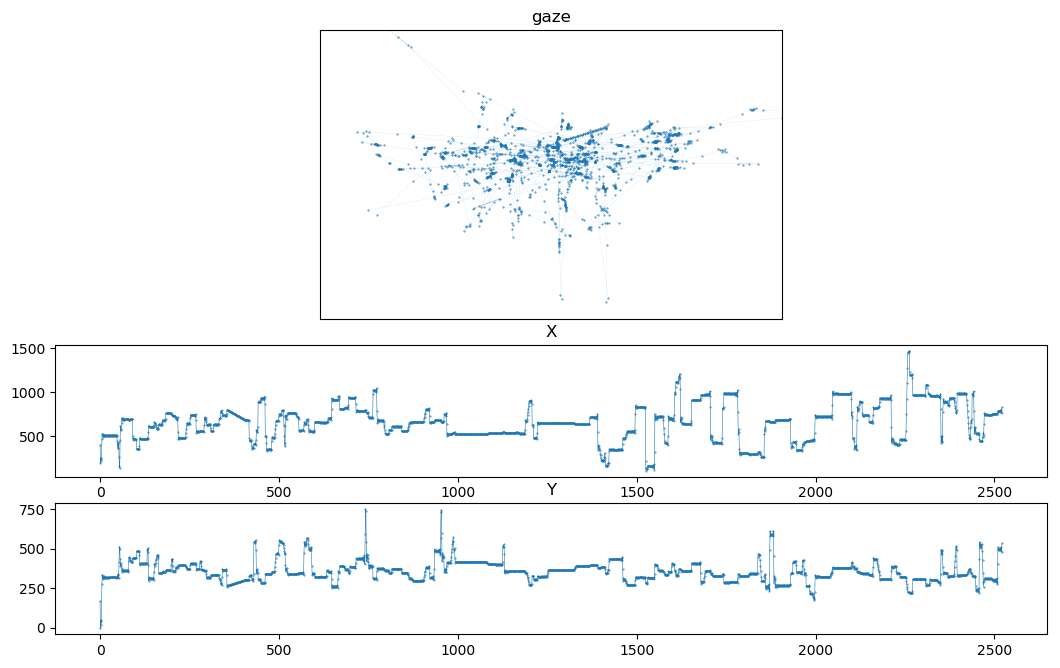

In [17]:
plot_data_per_session(fixations_x, fixations_y, 3790)